# Augment images for racecar training
<ol>
    <li> Flip images
    <li> Adjust lighting
    <li> Jitter
    <li> Add noise to target variable 
    <li> Add noise to input
</ol>

In [45]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

import string
import random

import torchvision.transforms as transforms
import matplotlib.image as mpimg
from PIL import Image, ImageEnhance
import cv2

read_path = "../../data/images/"
img_paths = glob.glob(read_path + "*.jpg")

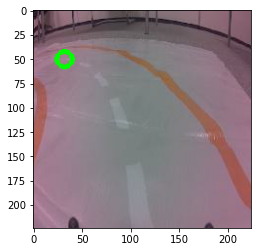

In [12]:
#Load example image
name = "32_50_c78164b4-40d2-11ed-a47b-a46bb6070c92.jpg"
x = int(name.split("_")[0])
y = int(name.split("_")[1])

img = mpimg.imread(read_path + name)
cv2.circle(img, (x, y), 8, (0, 255, 0), 3)

plt.imshow(img)

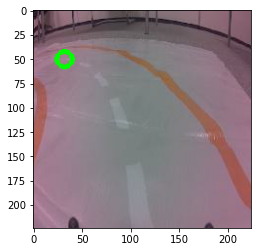

In [13]:
def get_img(path):
    """Return name, (x,y) target and image at a given path"""
    name = path.split("/")[-1] 
    x = int(name.split("_")[0])
    y = int(name.split("_")[1])
    
    img = mpimg.imread(path)
    
    return name, (x, y) , img 
 
name, target, img = get_img(img_paths[1])
cv2.circle(img, target, 8, (0, 255, 0), 3)
plt.imshow(img)

## 1) Image flipping 

In [14]:
def flip_img(name,img):
    """Invert image and target on x axis"""
    
    # flip image
    img = cv2.flip(img,1)
    
    # flip target variable
    s = name.split("_")
    s[0] = str(224 - int(s[0]))
    name = "_".join(s)
    
    return name, img   

32_50_c78164b4-40d2-11ed-a47b-a46bb6070c92.jpg
192_50_c78164b4-40d2-11ed-a47b-a46bb6070c92.jpg


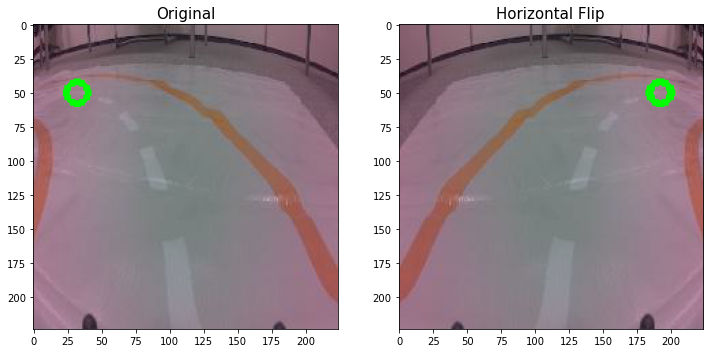

In [18]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

#Original image
name, target, img = get_img(img_paths[1])
cv2.circle(img, target, 8, (0, 255, 0), 3)

ax[0].imshow(img)
ax[0].set_title("Original",size=15)

#Flipped image
name_flip, img_flip = flip_img(name,img)
x = int(name_flip.split("_")[0])
y = int(name_flip.split("_")[1])
cv2.circle(img_flip, (x, y), 8, (0, 255, 0), 3)

ax[1].imshow(img_flip)
ax[1].set_title("Horizontal Flip",size=15)

print(name)
print(name_flip)


Text(0.5, 1.0, 'Vertical Flip')

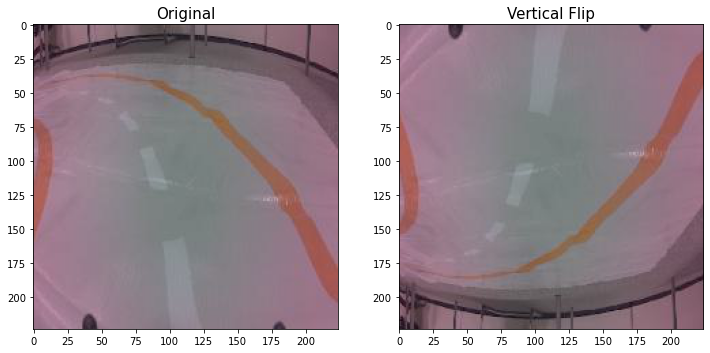

In [19]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

#Original image
name, target, img = get_img(img_paths[1])

ax[0].imshow(img)
ax[0].set_title("Original",size=15)

#Flipped image
img_flip = cv2.flip(img,0)

ax[1].imshow(img_flip)
ax[1].set_title("Vertical Flip",size=15)


## 2) Brightness

In [25]:
def adjust_brightness(img,factor=1):
    """
    Invert image on x axis
        factor: brightness level <1 will decrease and >1 will increase
    """
    img = Image.fromarray(img)
    
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(factor)

    return img

Text(0.5, 1.0, 'factor = 0.8')

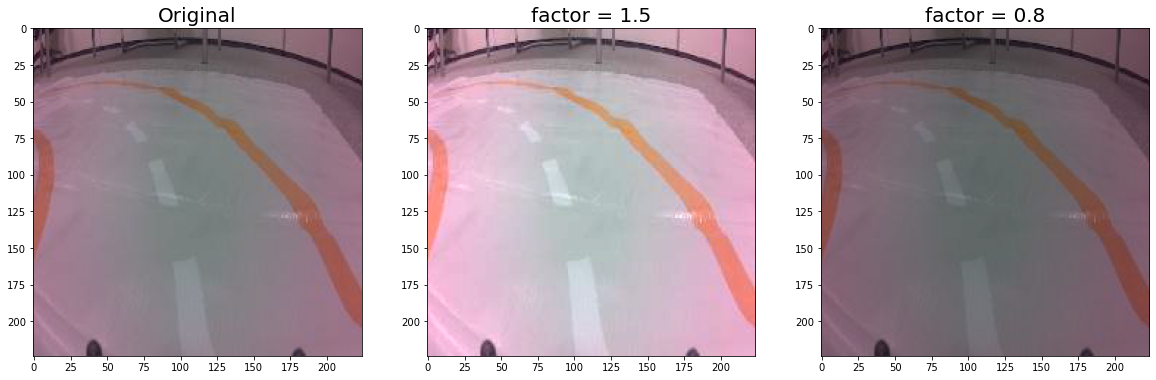

In [31]:
fig,ax = plt.subplots(1,3,figsize=(20,10))

#Original image
name,target, img = get_img(img_paths[1])

ax[0].imshow(img)
ax[0].set_title("Original",size=20)

#Increase brightness
img_bright = adjust_brightness(img,1.5)

ax[1].imshow(img_bright)
ax[1].set_title("factor = 1.5",size=20)

#Decrease brightness
img_dark = adjust_brightness(img,0.8)

ax[2].imshow(img_dark)
ax[2].set_title("factor = 0.8",size=20)

## 3)  Jitter

In [41]:
def jitter(img, b=0.2, c=0.2, s=0.2, h=0.1):
    """
    Randomly alter brightness, contrast, saturation, hue within given range
    Note: img should be a PIL image"""
    
    img = Image.fromarray(img)
    
    transform = transforms.ColorJitter(
    brightness=b, contrast=c, saturation=s, hue=h)
  
    # apply transform
    img = transform(img)
    
    return img
    

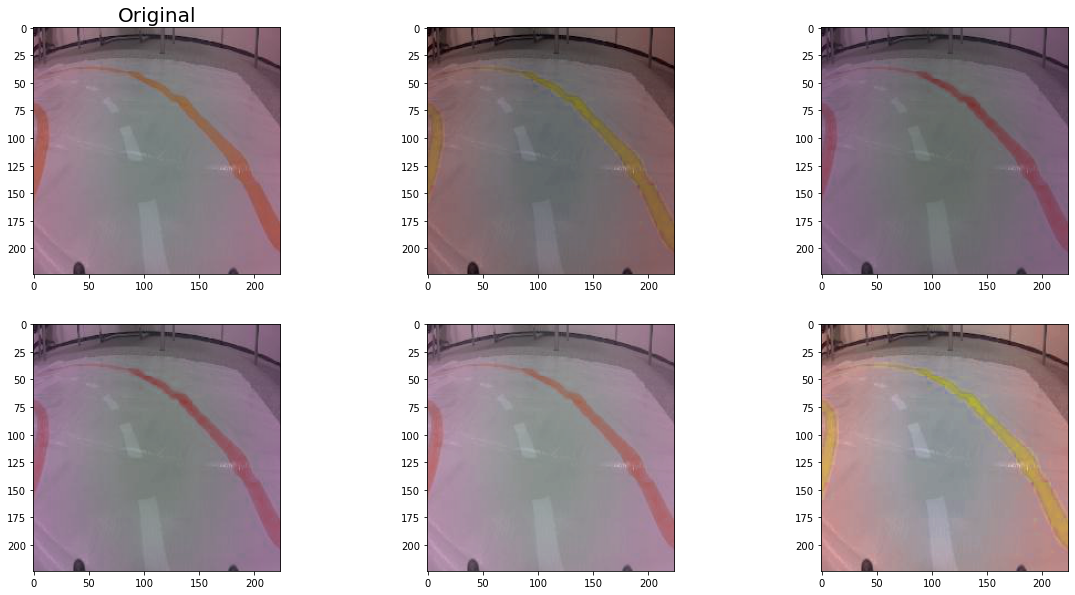

In [42]:
fig,ax = plt.subplots(2,3,figsize=(20,10))

#Original image
original_img = mpimg.imread(img_paths[1])

for i in [0,1]:
    for j in [0,1,2]:
        if (i == 0) & (j==0): 
            ax[i,j].imshow(original_img)
            ax[i,j].set_title("Original",size=20)
        else: 
            img = jitter(original_img)
            ax[i,j].imshow(img)

## 4) Noise target variable

In [46]:
def random_string(length=20):
    """Returns a random string of lowercase letters and digits"""
    
    letters = string.ascii_lowercase + string.digits
    rchoice = [random.choice(letters) for i in range(length)]
    rstring = ''.join(rchoice)
    
    return rstring

random_string()

'2uuz1nhnc39ds2z2rxfi'

In [51]:
def noise_target(name,x_var=5,y_var=5):
    """
    Vary the target variable
        x_var: variance for x coordinate 
        y_var: variance for y coordinate
    """
    
    s = name.split("_")
    x = int(s[0])
    y = int(s[1])
    
    #adjust x
    new_x = x + random.randint(-x_var,x_var)
    new_x = max(0,new_x)
    new_x = min(224,new_x)
    
    #adjust y
    new_y = y + random.randint(-y_var,y_var)
    new_y = max(0,new_y)
    new_y = min(224,new_y)
    
    #update name
    rstring = random_string()
    new_name = "{}_{}_{}.jpg".format(new_x,new_y,rstring)
    
    return new_name


name, target, img = get_img(img_paths[1])
print(name)
print(noise_target(name))
print(noise_target(name))

32_50_c78164b4-40d2-11ed-a47b-a46bb6070c92.jpg
28_47_65mrp73lh2dqf6czwsi4.jpg
31_51_gwk7h3nfr3nfhu4vxk5j.jpg


## 5) Input noise

In [161]:
def gaussian_noise(img,var=5):
    """Add guassian noise to image"""
    
    dims = np.shape(img)
    
    noise = np.random.normal(0,var,size=dims).astype("uint8")
    img = img + noise
    
    return img

def sp_noise(img,prob=0.1):
    """Add salt and pepper noise to image"""
    
    height,width,channels = np.shape(img)
    img = np.array(img)
    
    for i in range(height):
        for j in range(width):
            #Randomly change pixel values
            if random.random()<prob:
                if random.random() < 0.5:
                    img[i][j] = np.array([255,255,255]) #white
                else:
                    img[i][j] = np.array([0,0,0]) #black
                    
    img = Image.fromarray(img)
        
    return img

def delete_square(img,pixels=20):
    """Delete random square from image"""
    
    img = np.array(img)
    h,w,channels = np.shape(img)
    
    #Random starting pixel
    rh = random.randint(0,h)
    rw = random.randint(0,w)
  
    sub = round(pixels/2)
    add = pixels-sub
    
    #Boundries for square
    hmin = max(rh-sub,0)
    hmax = min(rh+add,h-1)
    vmin = max(rw-sub,0)
    vmax = min(rw+add,w-1)
    
    # Turn pixel within range black
    img[hmin:hmax,vmin:vmax] = np.array([0,0,0])

    img = Image.fromarray(img)
    return img

Text(0.5, 1.0, 'pixels = 100')

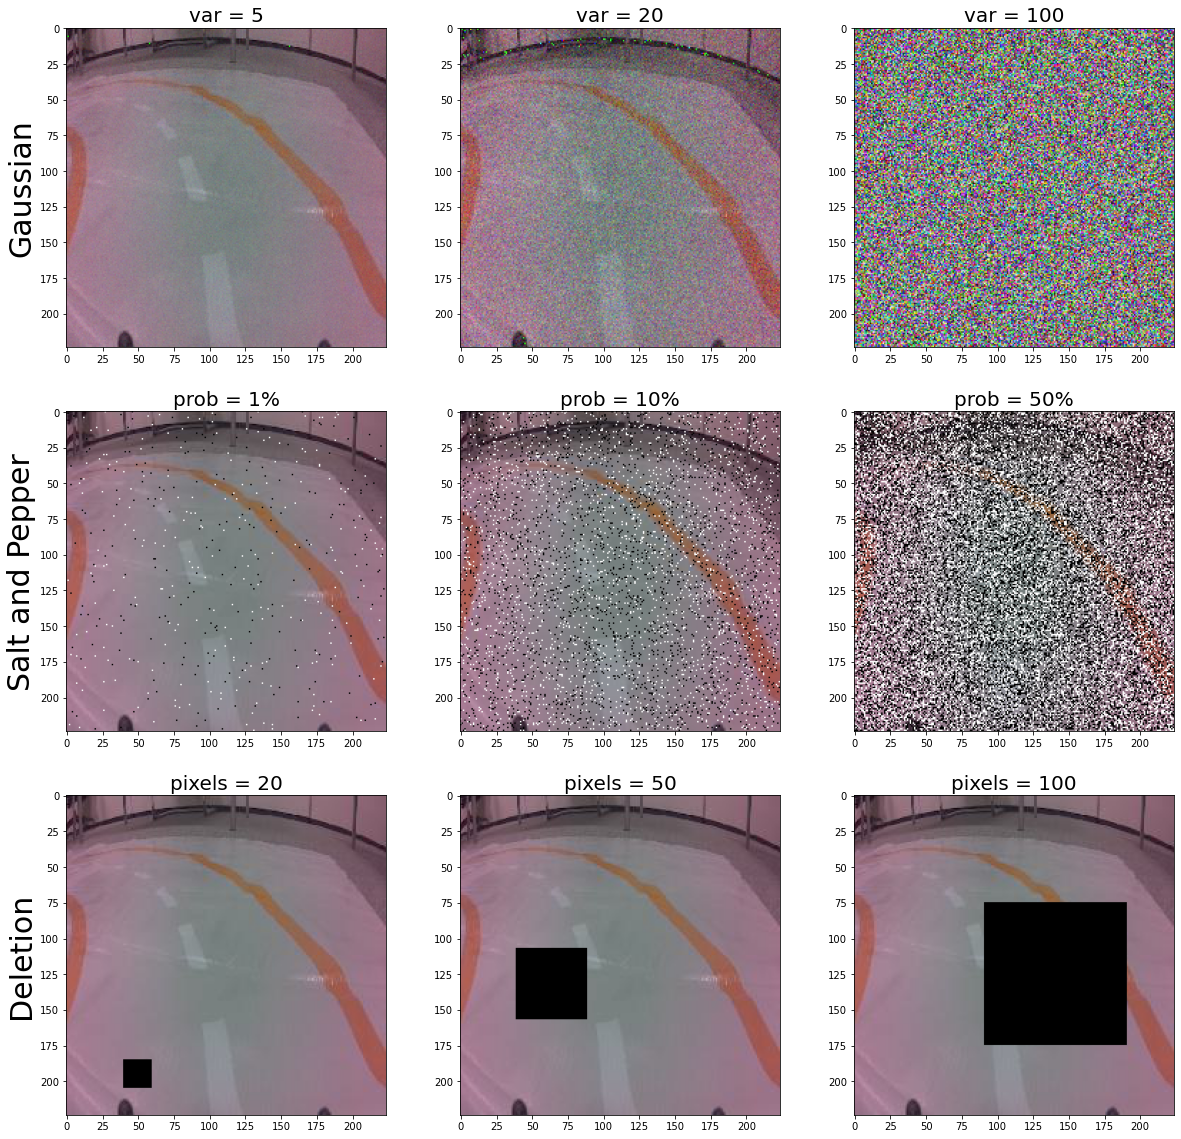

In [162]:
fig,ax = plt.subplots(3,3,figsize=(20,20))

#Original image
name,target, img = get_img(img_paths[1])

#Gaussian noise
ax[0,0].imshow(gaussian_noise(img,5))
ax[0,0].set_title("var = 5",size=20)
ax[0,0].set_ylabel("Gaussian",size=30)

ax[0,1].imshow(gaussian_noise(img,20))
ax[0,1].set_title("var = 20",size=20)

ax[0,2].imshow(gaussian_noise(img,100))
ax[0,2].set_title("var = 100",size=20)

#Salt and pepper
ax[1,0].imshow(sp_noise(img,0.01))
ax[1,0].set_title("prob = 1%",size=20)
ax[1,0].set_ylabel("Salt and Pepper",size=30)

ax[1,1].imshow(sp_noise(img,0.1))
ax[1,1].set_title("prob = 10%",size=20)

ax[1,2].imshow(sp_noise(img,0.5))
ax[1,2].set_title("prob = 50%",size=20)

#Deletion
ax[2,0].imshow(delete_square(img,20))
ax[2,0].set_title("pixels = 20",size=20)
ax[2,0].set_ylabel("Deletion",size=30)

ax[2,1].imshow(delete_square(img,50))
ax[2,1].set_title("pixels = 50",size=20)

ax[2,2].imshow(delete_square(img,100))
ax[2,2].set_title("pixels = 100",size=20)

In [ ]:
# Cover image